# WeatherPy-SEngeling-Final
----

### Analysis
* The weather is warmer the closer a city is to the equator (0 degrees Latitude), but at this time of year the areas of the southern hemisphere are already very warm while there is a dramatic drop in temperature the farther into the norther hemishphere.
* There isn't a clear relationship between latitude and cloudiness. However, there are strong bands of cities at 0, 75, and 90% cloudiness.
* There isn't a clear relationship between latitude and wind speed. However, in both hemispheres there are a smattering of cities that have winds over 20 mph.

In [1]:
from datetime import datetime

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# base url for open weather map
url = "http://api.openweathermap.org/data/2.5/weather?"
# define the units as imperial to get farenheit data
units = "imperial"

# build a function to iterate through "cities" list and return data from open weather map
def find_weather(city):
    
    #query url with api_key, units and the city from the "cities" list
    query_url = f"{url}appid={api_key}&units={units}&q={city}&cnt=50"

    # request the response from openweathermap.com
    response = requests.get(query_url).json()
    # print a response that lets the user know it is collecting weather data for the city in "cities" list
    print(f"Locating data for {city}.")
    
    # try to pull verious pieces of data out of open weather map
    try:        
        country = response['sys']['country']
        latitude = response['coord']['lat']
        longitude = response['coord']['lon']
        max_temp = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response['clouds']['all']
        wind = response['wind']['speed']
        date = response['dt']
        
        # if the data is found, return the variables and put them in a dictionary
        return {
            'city': city,
            'country': country,
            'latitude': latitude,
            'longitude': longitude,
            'max_temp': max_temp,
            'humidity': humid,
            'cloudiness': cloud,
            'wind_speed': wind,
            'date': date
        }
    # handle exceptions for key or index errors and print a message to let the user know that the city is being skipped
    except (KeyError, IndexError):
        print(f"data for {city} not found... skipping.")

        # if data is not found, return NaN from numpy
        return {
            'city': city,
            'country': np.nan,
            'latitude': np.nan,
            'longitude': np.nan,
            'max_temp': np.nan,
            'humidity': np.nan,
            'cloudiness': np.nan,
            'wind_speed': np.nan,
            'date': np.nan
        }
    # create an exception to handle any timeout or connection errors thrown when pulling the city data
    except Exception:
        print(f"Timed out trying to find {city}. :(")
        pass

# use the above function to find the weather data for each city in "cities" list and assign it to a variable
weather_records = [find_weather(city) for city in cities]

Locating data for myaundzha.
Locating data for albany.
Locating data for ushuaia.
Locating data for buala.
Locating data for hermanus.
Locating data for turukhansk.
Locating data for port elizabeth.
Locating data for kaeo.
Locating data for soure.
Locating data for novaya malykla.
Locating data for cape town.
Locating data for namatanai.
Locating data for lebu.
Locating data for xichang.
Locating data for bredasdorp.
Locating data for sioux lookout.
Locating data for marsh harbour.
Locating data for bosaso.
Locating data for kapaa.
Locating data for mvangue.
Locating data for mar del plata.
Locating data for rikitea.
Locating data for punta arenas.
Locating data for yanam.
Locating data for mapiripan.
Locating data for sao filipe.
Locating data for seevetal.
Locating data for pathein.
Locating data for komsomolskiy.
Locating data for new norfolk.
Locating data for carnarvon.
Locating data for taolanaro.
data for taolanaro not found... skipping.
Locating data for castro.
Locating data f

Locating data for faanui.
Locating data for blagoyevo.
Locating data for georgetown.
Locating data for praia da vitoria.
Locating data for dobryanka.
Locating data for constitucion.
Locating data for bahia blanca.
Locating data for bathsheba.
Locating data for yeppoon.
Locating data for chapais.
Locating data for jasper.
Locating data for tuktoyaktuk.
Locating data for belushya guba.
data for belushya guba not found... skipping.
Locating data for saint-philippe.
Locating data for pestovo.
Locating data for langsa.
Locating data for guelengdeng.
data for guelengdeng not found... skipping.
Locating data for los llanos de aridane.
Locating data for umm durman.
data for umm durman not found... skipping.
Locating data for iqaluit.
Locating data for leshukonskoye.
Locating data for blythe.
Locating data for vao.
Locating data for maghama.
data for maghama not found... skipping.
Locating data for isangel.
Locating data for berlevag.
Locating data for tilichiki.
Locating data for kusti.
data f

Locating data for muyezerskiy.
Locating data for gaoua.
Locating data for pisco.
Locating data for wad rawah.
Locating data for grand gaube.
Locating data for souillac.
Locating data for mogadouro.
Locating data for tezu.
Locating data for orimattila.
Locating data for comodoro rivadavia.
Locating data for tokonou.
Locating data for yenagoa.
Locating data for darovskoy.
Locating data for port hawkesbury.
Locating data for tandil.
Locating data for ponazyrevo.
Locating data for dunedin.
Locating data for kourou.
Locating data for vallenar.
Locating data for gurskoye.
data for gurskoye not found... skipping.
Locating data for nabire.
Locating data for el balyana.
data for el balyana not found... skipping.
Locating data for najran.
Locating data for warrnambool.
Locating data for mokokchung.
Locating data for kachikau.
data for kachikau not found... skipping.
Locating data for roald.
Locating data for biloela.
Locating data for port lincoln.
Locating data for sabla.
Locating data for bayk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# create a data frame out of the data
df = pd.DataFrame(weather_records)

#df.columns

# give the columns of the dataframe an order and index and print the df
df = df[['city', 'country', 'latitude', 'longitude', 'max_temp', 'humidity', 'cloudiness', 'wind_speed', 'date']].set_index('city')
df['date'] = pd.to_datetime(df['date'], unit='s')
date = str(datetime.now()).split(' ')[0]
date
df

,country,latitude,longitude,max_temp,humidity,cloudiness,wind_speed,date
city,,,,,,,,
myaundzha,RU,63.05,147.18,-11.75,67.0,56.0,3.60,2019-03-06 00:00:42
albany,US,42.65,-73.75,26.01,48.0,90.0,5.82,2019-03-05 23:57:38
ushuaia,AR,-54.81,-68.31,42.80,75.0,40.0,29.97,2019-03-05 23:00:00
buala,SB,-8.15,159.59,85.91,80.0,80.0,8.41,2019-03-06 00:00:43
hermanus,ZA,-34.42,19.24,69.01,80.0,0.0,10.00,2019-03-05 23:46:45
turukhansk,RU,65.80,87.96,13.46,91.0,80.0,14.00,2019-03-06 00:00:43
port elizabeth,US,39.31,-74.98,34.00,58.0,1.0,4.70,2019-03-06 00:00:43
kaeo,NZ,-35.10,173.78,73.99,61.0,0.0,1.99,2019-03-05 23:38:04
soure,PT,40.06,-8.63,57.99,93.0,75.0,19.46,2019-03-06 00:00:33


In [7]:
export_csv = df.to_csv(r'weather.csv', index=None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

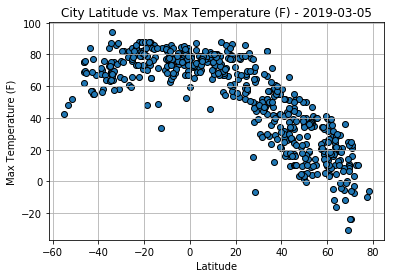

In [8]:
# Scatter plot for latitude and maximum temperature
plt.scatter(df["latitude"], df["max_temp"], marker="o", edgecolors="black")

# define the graph properties, title, xlabel, ylabel, and show the grid
plt.title(f"City Latitude vs. Max Temperature (F) - {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure to a png
plt.savefig("TemperatureInWorldCities.png")

# show the plot
plt.show()

#### Latitude vs. Humidity Plot

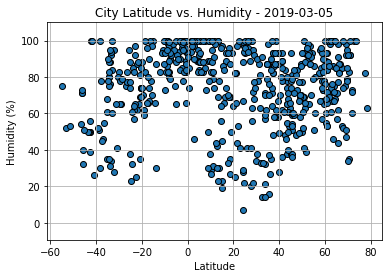

In [9]:
# Scatter plot for latitude and humidity
plt.scatter(df["latitude"], df["humidity"], marker="o", edgecolors="black")
plt.ylim(top=110)

# define the graph properties, title, xlabel, ylabel, and show the grid
plt.title(f"City Latitude vs. Humidity - {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure to a png
plt.savefig("HumidityInWorldCities.png")

# show the plot
plt.show()

#### Latitude vs. Cloudiness Plot

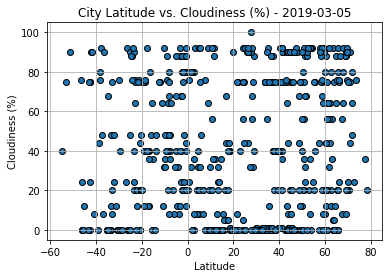

In [10]:
# Scatter plot for latitude and cloudiness
plt.scatter(df["latitude"], df["cloudiness"], marker="o", edgecolors="black")

# define the graph properties, title, xlabel, ylabel, and show the grid
plt.title(f"City Latitude vs. Cloudiness (%) - {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure to a png
plt.savefig("CloudinessInWorldCities.png")

# show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

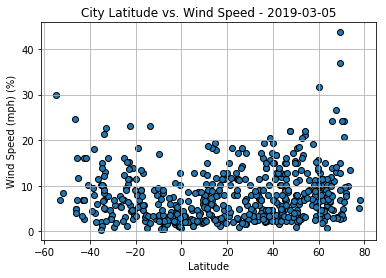

In [11]:
# Scatter plot for latitude and wind speed
plt.scatter(df["latitude"], df["wind_speed"], marker="o", edgecolors="black")

# define the graph properties, title, xlabel, ylabel, and show the grid
plt.title(f"City Latitude vs. Wind Speed - {date}")
plt.ylabel("Wind Speed (mph) (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure to a png
plt.savefig("WindSpeedInWorldCities.png")

# show the plot
plt.show()